# Análise dos dados de irradiação e temperatura # 

<h> Criandoas importações necessárias para leitura dos dados <h>

In [2]:
#libs para análise de dados
import pandas as pd
import numpy as np
import tensorflow as tf 

#lib para modificar aquivos dos sistema
import os

#lib para descomplactar arquivo
import zipfile

#visualização de dados 
from matplotlib import pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool

#preprocessamento dos dados
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


<p>Listando os aquivos .zip<p>

In [3]:
arquivos_f = [arquivo for arquivo in os.listdir('../dados curva iv') if arquivo.endswith('.zip')]
print(arquivos_f)

['1000-20240626T154100Z-001.zip', '600-20240626T153855Z-001.zip', '700-20240626T153926Z-001.zip', '800-20240626T153948Z-001.zip', '900-20240626T154008Z-001.zip']


<p>Descompactado os dados .zip para os pasta dados<p>

In [4]:
for arq in arquivos_f:
    with zipfile.ZipFile(arq, 'r') as zip_ref:
        zip_ref.extractall('DadosConsolidados')

<p>Percorrendo as pastas e subpastas para encontrar os dados<p>

In [5]:
pastas = os.listdir('./DadosConsolidados') # econtrando o nomes das pastas
subpastas = os.listdir(f'./DadosConsolidados/{pastas[0]}') #encontrando os nomes das subspastas (como o nome é o mesmo para cada pasta so foi feito para o primeiro elemento)

#lista de DataFrame
df = []

for pasta in pastas:
    
    for sub in subpastas:
        dir = f'./DadosConsolidados/{pasta}/{sub}' #set diretorio
        ordem = 1

        for arquivo in os.listdir(dir):
            if arquivo.endswith('.dat'):
                
                a = pd.read_csv(f'{dir}/{arquivo}', sep='\t', encoding='latin-1')
                a.columns=['Corrente(A)']
                a.index.names =["Tensão(V)"] 
                a['Irradiação'] = np.full(a.shape[0], int(pasta))
                a['Temperatura'] = np.full(a.shape[0], int(sub))
                a['Ocorrência'] = np.full(a.shape[0], ordem)

                df.append(a)
                ordem += 1
                


In [6]:
dff = pd.concat(df) # concatenado os dados em um único dataset

In [7]:
dff

,Corrente(A),Irradiação,Temperatura,Ocorrência
Tensão(V),,,,
0,0.0 -0.1004411,1000,25,1
1,0.01 -0.09958977,1000,25,1
2,0.02 -0.09955372,1000,25,1
3,0.03 -0.09991045,1000,25,1
4,0.04 -0.09930861,1000,25,1
...,...,...,...,...
0.6,0.08684,900,55,10
0.61,0.10893,900,55,10
0.62,0.1318,900,55,10


<p>Corrigindo os dados de tensão de todo o dataset, por que os dados estão sendo usados como index

In [8]:
dff.reset_index(inplace=True) #resetando o index

In [9]:
dff

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
0,0,0.0 -0.1004411,1000,25,1
1,1,0.01 -0.09958977,1000,25,1
2,2,0.02 -0.09955372,1000,25,1
3,3,0.03 -0.09991045,1000,25,1
4,4,0.04 -0.09930861,1000,25,1
...,...,...,...,...,...
22746,0.6,0.08684,900,55,10
22747,0.61,0.10893,900,55,10
22748,0.62,0.1318,900,55,10
22749,0.63,0.15554,900,55,10


<p>Observando os dados de irradiação é possível verificar que para a irradiação de 1000 o dados estão em um formato incorreto para dados numéricos<p>
<p>Devemos corrigir algumas informações do dataset:<p>
<ol>
    <li>Verificar se os dados de iradiação estão no formato correto 
    <li>Verrificar os dados de tensão e corrigir caso seja necessário
    <li>Confirmar quais dados deve ser positivos e negativos



<ol><li> Verificar se os dados de iradiação estão no formato correto 

In [10]:
dff[dff['Irradiação']==1000].head()
# será necessario corrigir os dados de corrente e tensão para irradiação de 1000 

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
0,0,0.0 -0.1004411,1000,25,1
1,1,0.01 -0.09958977,1000,25,1
2,2,0.02 -0.09955372,1000,25,1
3,3,0.03 -0.09991045,1000,25,1
4,4,0.04 -0.09930861,1000,25,1


In [11]:
dff[dff['Irradiação']==900].head()
#estão corretos

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
18201,0,-0.08789,900,25,1
18202,0.01,-0.08714,900,25,1
18203,0.02,-0.08711,900,25,1
18204,0.03,-0.08742,900,25,1
18205,0.04,-0.0869,900,25,1


In [12]:
dff[dff['Irradiação']==800].head()
#estão corretos

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
13650,0.0,-0.07533,800,25,1
13651,0.01,-0.07469,800,25,1
13652,0.02,-0.07467,800,25,1
13653,0.03,-0.07493,800,25,1
13654,0.04,-0.07448,800,25,1


In [13]:
dff[dff['Irradiação']==700].head()
#estão corretos

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
9100,0.0,-0.06278,700,25,1
9101,0.01,-0.06224,700,25,1
9102,0.02,-0.06222,700,25,1
9103,0.03,-0.06244,700,25,1
9104,0.04,-0.06207,700,25,1


In [14]:
dff[dff['Irradiação']==600].head()
#estão corretos

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
4550,0.0,-0.05381,600,25,1
4551,0.01,-0.05335,600,25,1
4552,0.02,-0.05333,600,25,1
4553,0.03,-0.05352,600,25,1
4554,0.04,-0.0532,600,25,1


<p>Os dados de tensão e corrente da irradiação de 1000 serão necessário a correção, os demais em uma primeira análise estão corretos

<ul>
    <li> Verificando em todoas as temperaturas será necessário corrigir

In [15]:
dff[dff['Irradiação']==1000][dff[dff['Irradiação']==1000]['Temperatura']==30].head()

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
650,0,0.0 -0.1003122,1000,30,1
651,1,0.01 -0.1002643,1000,30,1
652,2,0.02 -0.1001781,1000,30,1
653,3,0.03 -0.1002105,1000,30,1
654,4,0.04 -0.1001443,1000,30,1


In [16]:
dff[dff['Irradiação']==1000][dff[dff['Irradiação']==1000]['Temperatura']==50].head()

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
3250,0.0,-0.09892,1000,50,1
3251,0.01,-0.09894,1000,50,1
3252,0.02,-0.09888,1000,50,1
3253,0.03,-0.09888,1000,50,1
3254,0.04,-0.09882,1000,50,1


<p> Não são todos as temperaturas, com isso vamos corrigir somente as que sejá possível fazer o comando "split" do tipo "str" do python
<p> Com isso, usaremos o "for" percorrendo o df desde a posição incial da irradiação de 1000 até a última ocorrencia

In [17]:
tensao = []
corrente = []
dimesao = dff[dff['Irradiação']==1000].shape[0]

for i in range(dimesao):
    try:
        it = dff[dff['Irradiação']==1000].iloc[i]['Corrente(A)'].split(' ')

    except AttributeError:
        tensao.append(float(dff[dff['Irradiação']==1000].iloc[i]['Tensão(V)']))
        corrente.append(float(dff[dff['Irradiação']==1000].iloc[i]['Corrente(A)']))
        continue

    tensao.append(float(it[0]))
    corrente.append(float(it[-1]))

In [18]:
len(corrente)

4550

<p>Os dados da correnta e tensão para a irradiação a 1000 estão localizados da posição 0 à 4550 na primeira e segunda coluna (index:0, 1), com isso vamos corrigir os valores pelos corretos

In [19]:
dff.iloc[0:4550, 1]=corrente
dff.iloc[0:4550, 0]=tensao

In [20]:
dff[dff['Irradiação']==1000].head()

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
0,0.0,-0.100441,1000,25,1
1,0.01,-0.09959,1000,25,1
2,0.02,-0.099554,1000,25,1
3,0.03,-0.09991,1000,25,1
4,0.04,-0.099309,1000,25,1


<ol>

<li value=2>Verrificar os dados de tensão e corrigir caso seja necessário

In [21]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tensão(V)    22751 non-null  object
 1   Corrente(A)  22750 non-null  object
 2   Irradiação   22751 non-null  int32 
 3   Temperatura  22751 non-null  int32 
 4   Ocorrência   22751 non-null  int32 
dtypes: int32(3), object(2)
memory usage: 622.2+ KB


<p>Mudando o tipo de dados de "object" para float das colunas Tensâo e Corrente

In [22]:
dff['Corrente(A)'] = dff['Corrente(A)'].astype('float')
#para a coluna tensão houve o retorno de um erro, devemos corrigir os dados antes

In [23]:
try:
    dff['Tensão(V)'].astype('float') #retorna erro, devemos corrigir os dados antes
    #ValueError: could not convert string to float: '0.64    0.04476'
except Exception as e:
    print(f"Ocorreu um erro: {type(e).__name__}")

Ocorreu um erro: ValueError


In [24]:
dff.loc[dff['Tensão(V)'] == '0.64    0.04476']

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
18265,0.64 0.04476,NaN,900,25,1


In [25]:
tensao = []
corrente = []
dimensao = dff.shape[0]

for i in range(dimensao):
    try:
        tensao.append(float(dff['Tensão(V)'].iloc[i]))
    except ValueError:
        tensao.append(float(dff['Tensão(V)'].iloc[i].split(' ')[0]))
        corrente.append(float(dff['Tensão(V)'].iloc[i].split(' ')[-1]))

In [26]:
corrente

[0.04476]

In [27]:
dff.iloc[18265, 0] = float('0.64')
dff.iloc[18265, 1] = float('0.04476')


In [28]:
dff['Corrente(A)'] = dff['Corrente(A)'].astype('float')
dff['Tensão(V)'] = dff['Tensão(V)'].astype('float')

In [29]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22751 entries, 0 to 22750
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tensão(V)    22751 non-null  float64
 1   Corrente(A)  22751 non-null  float64
 2   Irradiação   22751 non-null  int32  
 3   Temperatura  22751 non-null  int32  
 4   Ocorrência   22751 non-null  int32  
dtypes: float64(2), int32(3)
memory usage: 622.2 KB


<ol>
<li value=3>Confirmar quais dados deve ser positivos e negativos

In [30]:
dff.loc[dff['Tensão(V)'] == 0].loc[dff['Corrente(A)']>0]

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
10400,0.0,0.06260,700,35,1
10465,0.0,0.06260,700,35,2
11050,0.0,0.06219,700,40,1
11440,0.0,0.06219,700,40,7
11700,0.0,0.06197,700,45,1
12285,0.0,0.06197,700,45,10
12350,0.0,0.06182,700,50,1
13000,0.0,0.06168,700,55,1
14300,0.0,0.07523,800,30,1
14365,0.0,0.07523,800,30,2


<p>Podemos perceber que apenas alguns valores de corrente para a tensão igual a zero são positivos, não ocorrendo em todas as temperaturas e nem e todas irradiação (podemos afimar que os dados de corrente para irradiação de 1000 são todos negativos). Com isso, podemos concluir que esse valores e corrente para essa dada temperatura e irradiação devem devem ser corrigidos. 
<p> 

In [31]:
def correcaoDados(df, cor):

    for i, t, o in cor:
        corrente = df.loc[df['Irradiação']==i].loc[df['Temperatura']==t].loc[df['Ocorrência']==o]['Corrente(A)']
        df.iloc[corrente.index, 1] = corrente * (-1)
    
    return df

In [32]:
correcaoUm = dff.loc[dff['Tensão(V)'] == 0].loc[dff['Corrente(A)']<0][['Irradiação',	'Temperatura',	'Ocorrência']].values

dff = correcaoDados(dff, correcaoUm)

In [33]:
dff.loc[dff['Tensão(V)'] == 0].loc[dff['Corrente(A)']>0]['Irradiação'].value_counts() # contagem das ocorrencias (tensão igual a zero e corrente positiva) para cada irradiação  

Irradiação
1000    70
600     70
700     70
800     70
900     70
Name: count, dtype: int64

In [34]:
dff.loc[dff['Tensão(V)'] == 0.64].loc[dff['Corrente(A)']<0]['Irradiação'].value_counts() # contagem das ocorrencias (tensão igual a zero e negativa) para cada irradiação  

Irradiação
1000    70
600     70
700     70
900     70
800     67
Name: count, dtype: int64

<p> Ainda existem dados incorretos no df 

In [35]:
dff.loc[dff['Tensão(V)'] == 0.64].loc[dff['Corrente(A)']>0].loc[dff['Irradiação']==800]

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
14429,0.64,0.05152,800,30,2
14755,0.64,0.05152,800,30,7
14950,0.64,0.05173,800,30,10


<p>Ainda existe três dados que não foram corrigido como isso devemos tratar esses três dados

Text(0, 0.5, 'Corrente(A)')

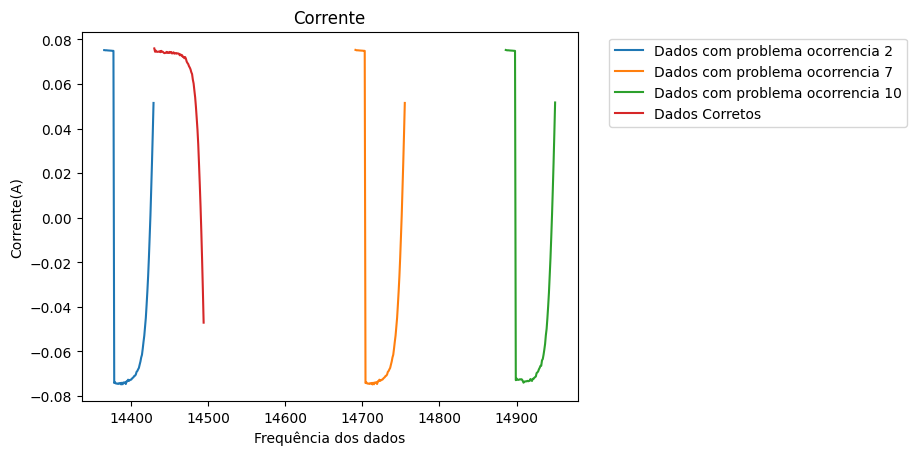

In [36]:
fig, ax = plt.subplots()

ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==2]['Corrente(A)'], label = 'Dados com problema ocorrencia 2')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==7]['Corrente(A)'], label = 'Dados com problema ocorrencia 7')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==10]['Corrente(A)'], label = 'Dados com problema ocorrencia 10')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==3]['Corrente(A)'], label = 'Dados Corretos')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title('Corrente')
ax.set_xlabel('Frequência dos dados')
ax.set_ylabel('Corrente(A)')

<p>O erro está no dados inicias, como pode ser visualizado dos gráficos, os dados começam de forma correta e depois existe a inversão para o negativo, coisa que não ocorre nos dados corretos (segunda linha do gráfico).
<p>Vamos visualizar de forma mais precisa onde ocorre essa inversão

In [37]:
axDf =  dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==10]

x = axDf['Tensão(V)']
y = axDf['Corrente(A)']

# source = ColumnDataSource(data=dict(x=x, y=y))

output_notebook()

p = figure(title="Curva Tensão por Corrente", x_axis_label='Tensão', y_axis_label='Corrente',  width=800, height=600)

p.scatter(x, y, size=10, color="navy", alpha=0.4)
p.line(x, y, legend_label="Curva", line_width=2)

hover = HoverTool()
hover.tooltips = [
    ("X", "@x"),
    ("Y", "@y")
]
p.add_tools(hover)


show(p)




Loading BokehJS ...

<p>Foi possível identificar o ponto 0.13 como o ponto onde se inicia o erro, sendo igual nas três ocorrência
<p> Iremos corrigir esse erro


In [38]:
for i in [2,7,10]:
    axDff = dff.loc[dff['Tensão(V)'] >= 0.13].loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==i]
    dff.iloc[axDff.index, 1] = axDff['Corrente(A)'] * (-1)

Text(0, 0.5, 'Corrente(A)')

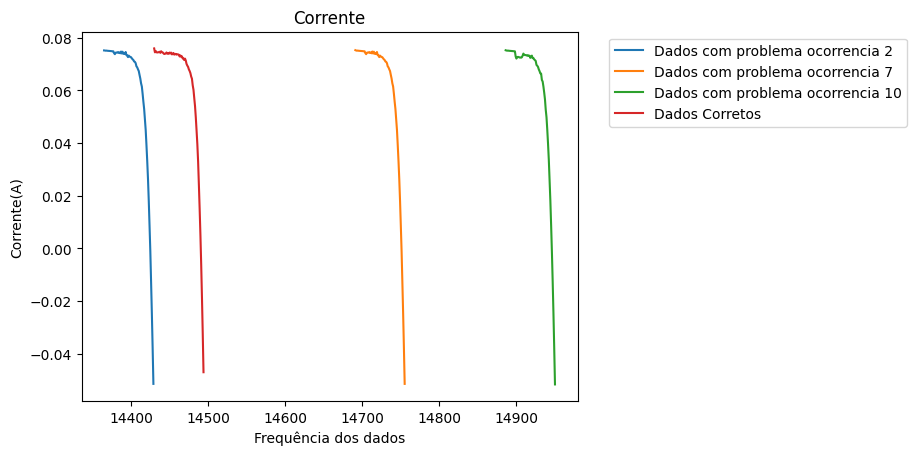

In [39]:
fig, ax = plt.subplots()

ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==2]['Corrente(A)'], label = 'Dados com problema ocorrencia 2')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==7]['Corrente(A)'], label = 'Dados com problema ocorrencia 7')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==10]['Corrente(A)'], label = 'Dados com problema ocorrencia 10')
ax.plot(dff.loc[dff['Irradiação']==800].loc[dff['Temperatura']==30].loc[dff['Ocorrência']==3]['Corrente(A)'], label = 'Dados Corretos')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title('Corrente')
ax.set_xlabel('Frequência dos dados')
ax.set_ylabel('Corrente(A)') 

In [40]:
dff.loc[dff['Tensão(V)'] == 0.64].loc[dff['Corrente(A)']<0]['Irradiação'].value_counts() # contagem das ocorrencias (tensão igual a zero e negativa) para cada irradiação  

Irradiação
1000    70
600     70
700     70
800     70
900     70
Name: count, dtype: int64

<p>Dados corrigidos

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<h3>Ánalise estatística

<p>Verificação de outlies 

<p> Usando a técnica do <strong>IQR</strong> para determinas quais pontos podem ser considerados como outliers.
<p>Para isso vamos usar o seguinte passo:
<ol>
    <li>Agrupar os Dados por Irradiação, Temperatura e Tensão(V)
    <li>Calcular Q1 (25º Percentil) e Q3 (75º Percentil)
    <li>Calcular o IQR (Q3 - Q1)
    <li>Determinar os Limites Inferior e Superior para Identificar Outliers
    <li>Filtrar os Outliers

In [41]:
grouped = dff.groupby(['Irradiação', 'Temperatura', 'Tensão(V)'])

# Função para calcular IQR e identificar outliers
def identificando_outliers(group):
    Q1 = group['Corrente(A)'].quantile(0.25)
    Q3 = group['Corrente(A)'].quantile(0.75)
    IQR = Q3 - Q1
    banda_inf = Q1 - 1.5 * IQR
    banda_super = Q3 + 1.5 * IQR
    return group[(group['Corrente(A)'] < banda_inf) | (group['Corrente(A)'] > banda_super)]

# Aplicar a função a cada grupo
outliers = grouped.apply(identificando_outliers).reset_index(drop=True)


C:\Users\rodri\AppData\Local\Temp\ipykernel_23808\4204213867.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = grouped.apply(identificando_outliers).reset_index(drop=True)


In [42]:
outliers.head()

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
0,0.04,0.05417,600,25,2
1,0.20,0.05161,600,25,3
2,0.23,0.05400,600,25,2
3,0.23,0.05203,600,25,8
4,0.24,0.05159,600,25,8


<p>Corrigindo os outlies

<p>Para corrigir esse valores de outliers da coluna corrente, calcularemos o valor da média de cada caso (para uma dada tensão, irradiação e temperatura) e substituiremos o valor considerado outlier pelo valor médio das 10 médidas</p>

In [43]:
for j in range(outliers.shape[0]):

    v, i, t, c = outliers[['Tensão(V)', 'Irradiação', 'Temperatura', 'Corrente(A)']].values[j]

    media = dff.loc[dff['Tensão(V)'] ==v].loc[dff['Irradiação']==i].loc[dff['Temperatura']==t]['Corrente(A)'].mean()
    index = dff.loc[dff['Tensão(V)'] ==v].loc[dff['Irradiação']==i].loc[dff['Temperatura']==t].loc[dff['Corrente(A)']==c].index

    dff.iloc[index, 1] = media # coluna de index = 1 que representa a coluna corrente(A) 


<p>Consultando para verificar se correções</p>

In [44]:
outliers.loc[outliers['Tensão(V)'] ==0.24].loc[outliers['Irradiação']==600].loc[outliers['Temperatura']==25].loc[outliers['Ocorrência']==8]

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
4,0.24,0.05159,600,25,8


In [45]:
dff.loc[dff['Tensão(V)'] ==0.24].loc[dff['Irradiação']==600].loc[dff['Temperatura']==25].loc[dff['Ocorrência']==8]

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
5029,0.24,0.052924,600,25,8


<p>Os outlies foram corrigidos

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

<h3>Treinando a Rede neural 
<h5>O obejetivo de encontrar a corrente para uma determinada tensão, temperarura e irradiância

In [46]:
dff.describe()

,Tensão(V),Corrente(A),Irradiação,Temperatura,Ocorrência
count,22751.000000,22751.000000,22751.000000,22751.00000,22751.000000
mean,0.319991,0.055424,800.000000,39.99956,5.500022
std,0.187621,0.043417,141.421356,10.00022,2.872283
min,0.000000,-0.213093,600.000000,25.00000,1.000000
25%,0.160000,0.051375,700.000000,30.00000,3.000000
50%,0.320000,0.062000,800.000000,40.00000,6.000000
75%,0.480000,0.084380,900.000000,50.00000,8.000000
max,0.640000,0.101250,1000.000000,55.00000,10.000000


<p> A redes neurais são mais eficientes trabalhando com valores que ficam entre 0 e 1, sendo assim será necessários fazer algumas normalizações nos dados do dataframe
<p> analisando cada coluna do dataframe: 
<ol>
    <li> Tensão(v), range de valores de 0:0.64  -> normalizar, apesar de estar o intervalo de 0 a 1
    <li> Corrente(A), range de valores de -0.213:0.101 -> normalizar, usando técnica minmaxscaler (<a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html>sklearn</a>)
    <li> Irradiação, range de valores de 600:1000 -> normalizar, usando técnica minmaxscaler (<a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html>sklearn</a>)
    <li> Temperatura, range de valores de 25:55 -> normalizar, usando técnica minmaxscaler (<a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html>sklearn</a>)

In [47]:
normalizador = MinMaxScaler()
alvoNorm = MinMaxScaler()

In [48]:
dfNorm = normalizador.fit_transform(dff.drop(['Corrente(A)','Ocorrência'], axis=1))

In [49]:
dfNorm = pd.DataFrame(dfNorm, columns=['Tensão(V)', 'Irradiação', 'Temperatura']) # recostruido o dataframe

In [50]:
dfNorm['Corrente(A)'] = alvoNorm.fit_transform(dff['Corrente(A)'].values.reshape(-1,1))

In [51]:
dfNorm

,Tensão(V),Irradiação,Temperatura,Corrente(A)
0,0.000000,1.00,0.0,0.997427
1,0.015625,1.00,0.0,0.994718
2,0.031250,1.00,0.0,0.994604
3,0.046875,1.00,0.0,0.995739
4,0.062500,1.00,0.0,0.993824
...,...,...,...,...
22746,0.937500,0.75,1.0,0.394734
22747,0.953125,0.75,1.0,0.323738
22748,0.968750,0.75,1.0,0.249335
22749,0.984375,0.75,1.0,0.171408


<p> Divisão entres os dados previsores e os previsto</p>
<ul>
    <li> Previsores: Irradiação, Temperatura e Tensão</li>
    <li> Previsto: Corrente</li>
</ul>

<p> Vamos separar um 20% dos dados para teste após o treinamento da rede neural</p>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(dfNorm.drop('Corrente(A)', axis=1), dfNorm['Corrente(A)'], test_size=0.2, random_state=4)

In [53]:
X_train.iloc[0].shape

(3,)

<p>Construido a rede neural. Utilizaremos RNNs (Recurrent neural networks) dos tipos principais LSTM e GRU</p>

<h3 style=color:red>Caso à rede já esteja teinada, pular para o passo "carregando rede"</h3>

<a href=https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU>GRU</a>

In [162]:
modelGRU = tf.keras.models.Sequential()

modelGRU.add(tf.keras.Input(shape=(3,1)))

modelGRU.add(tf.keras.layers.GRU(units=6, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)) 
modelGRU.add(tf.keras.layers.GRU(units=6, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)) #, dropout=0.1
modelGRU.add(tf.keras.layers.Dense(units=18, activation='relu')) #9
modelGRU.add(tf.keras.layers.Dropout(0.1))
modelGRU.add(tf.keras.layers.GRU(units=6, activation='tanh', recurrent_activation='sigmoid',return_sequences=True))
modelGRU.add(tf.keras.layers.GRU(units=6, activation='tanh', recurrent_activation='sigmoid'))


modelGRU.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

modelGRU.compile(loss = tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.R2Score()])

In [163]:
modelGRU.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_40 (GRU)                    │ (None, 3, 6)           │           162 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_41 (GRU)                    │ (None, 3, 6)           │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3, 18)          │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 3, 18)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_42 (GRU)                    │ (None, 3, 6)           │           468 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_43 (GRU)                    │ (None, 6)              │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,267 (4.95 KB)

 Trainable params: 1,267 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

In [164]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)
early_stopping =  tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20, restore_best_weights=True )

modelGRU.fit(X_train, y_train, epochs=1000,  batch_size= 25,  validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping]) #

Epoch 1/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0715 - r2_score: -7.4919 - val_loss: 0.0074 - val_r2_score: 0.2813 - learning_rate: 0.0010
Epoch 2/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0044 - r2_score: 0.5141 - val_loss: 0.0011 - val_r2_score: 0.8885 - learning_rate: 0.0010
Epoch 3/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0011 - r2_score: 0.8775 - val_loss: 5.7546e-04 - val_r2_score: 0.9441 - learning_rate: 0.0010
Epoch 4/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7.4165e-04 - r2_score: 0.9213 - val_loss: 3.2203e-04 - val_r2_score: 0.9687 - learning_rate: 0.0010
Epoch 5/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.9745e-04 - r2_score: 0.9448 - val_loss: 1.9006e-04 - val_r2_score: 0.9815 - learning_rate: 0.0010
Epoch 6/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.0673e-04 - r2_score: 0.9582 - val_loss: 2.0564e-04 - val_r2_score: 0.9800 - learning_rate: 0.0010
Epoch 7/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 3s 4m

In [319]:
modelGRU.save('modeloGRU.keras')

<a href= https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM>LSTM</a>

In [168]:
modellstm = tf.keras.models.Sequential()

modellstm.add(tf.keras.Input(shape=(3,1)))

modellstm.add(tf.keras.layers.LSTM(units=6, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)) 
modellstm.add(tf.keras.layers.LSTM(units=6, activation='tanh', recurrent_activation='sigmoid', return_sequences=True)) 
modellstm.add(tf.keras.layers.Dense(units=27, activation='relu')) #9
modellstm.add(tf.keras.layers.Dropout(0.1))
modellstm.add(tf.keras.layers.LSTM(units=6, activation='tanh', recurrent_activation='sigmoid',return_sequences=True))
modellstm.add(tf.keras.layers.LSTM(units=6, activation='tanh', recurrent_activation='sigmoid'))


modellstm.add(tf.keras.layers.Dense(units = 1, activation = "linear"))

modellstm.compile(loss = tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.R2Score()])

In [169]:
modellstm.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 3, 6)           │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 3, 6)           │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 3, 27)          │           189 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 3, 27)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 3, 6)           │           816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 6)              │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,828 (7.14 KB)

 Trainable params: 1,828 (7.14 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001, verbose=1)
early_stopping =  tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=20, restore_best_weights=True )

modellstm.fit(X_train, y_train, epochs=1000,  batch_size= 25,  validation_data=(X_test, y_test), callbacks=[reduce_lr, early_stopping]) #

Epoch 1/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - loss: 0.0838 - r2_score: -7.5074 - val_loss: 0.0069 - val_r2_score: 0.3263 - learning_rate: 0.0010
Epoch 2/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0050 - r2_score: 0.4673 - val_loss: 0.0027 - val_r2_score: 0.7370 - learning_rate: 0.0010
Epoch 3/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0024 - r2_score: 0.7459 - val_loss: 0.0017 - val_r2_score: 0.8315 - learning_rate: 0.0010
Epoch 4/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - loss: 0.0017 - r2_score: 0.8224 - val_loss: 8.2653e-04 - val_r2_score: 0.9198 - learning_rate: 0.0010
Epoch 5/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 8.2130e-04 - r2_score: 0.9120 - val_loss: 3.4359e-04 - val_r2_score: 0.9666 - learning_rate: 0.0010
Epoch 6/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5.0120e-04 - r2_score: 0.9462 - val_loss: 3.1452e-04 - val_r2_score: 0.9695 - learning_rate: 0.0010
Epoch 7/1000
728/728 ━━━━━━━━━━━━━━━━━━━━ 6s 8m

In [318]:
modellstm.save('modeloLSTM.keras')

<h3 style=color:red>Carregar modelo</h3>

In [55]:
modelGRU = tf.keras.models.load_model('modeloGRU.keras')
modellstm = tf.keras.models.load_model('modeloLSTM.keras')

<h4>Avaliação dos modelos com os dados de teste</h4>
<p>Usando as valores da MAE, MSE e R²</p>

In [56]:
previstoGRU = modelGRU.predict(X_test)
previstoLSTM = modellstm.predict(X_test)

143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [57]:
#importanções

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
maeGRU = mean_absolute_error(y_test, previstoGRU)
mseGRU = mean_squared_error(y_test, previstoGRU)
rscoreGRU = r2_score(y_test, previstoGRU)

print(f'Métricas do modelo MAE:{maeGRU}, MSE:{mseGRU} e R²:{rscoreGRU}')

Métricas do modelo MAE:0.006814596726932036, MSE:0.00020266922402844488 e R²:0.9901627265869777


In [59]:
maelstm = mean_absolute_error(y_test, previstoLSTM)
mselatm = mean_squared_error(y_test, previstoLSTM)
rscorelstm= r2_score(y_test, previstoLSTM)

print(f'Métricas do modelo MAE:{maelstm}, MSE:{mselatm} e R²:{rscorelstm}')

Métricas do modelo MAE:0.008281251994840474, MSE:0.00022672394291751852 e R²:0.9889951450376843


<p>Os valores do MAE e MSE ficaram bem baixos indicando que exite um erro bem baixo. Outro ponto é que o R² ficou bem próximo de 1 indicando que tanto o modelo de GRU e LSTM conseguiram fazer a regreção para os dados reais</p>

<p>Podemos plotar gráficos usando os dados simulados e os reais para ficar melhor a vizualização de como o modelo está se comportando</p>

In [60]:
irr = 1000
tmp = 40
tensao = np.arange(0.0, 0.65, 0.01)
irradiacao = np.full(tensao.shape[0], irr)
temperatura = np.full(tensao.shape[0], tmp)

In [61]:
dados = {
    'Tensão(V)':tensao,
    'Irradiação':irradiacao,
    'Temperatura':temperatura
}

In [62]:
dff_teste = pd.DataFrame(dados) #Tensão(V)	Irradiação	Temperatura

In [63]:
dff_teste.head()

,Tensão(V),Irradiação,Temperatura
0,0.00,1000,40
1,0.01,1000,40
2,0.02,1000,40
3,0.03,1000,40
4,0.04,1000,40


In [64]:
#normlizindo
dff_testeNorm = normalizador.transform(dff_teste)

In [65]:
previstoTesteGRU = modelGRU(dff_testeNorm)
previstoTesteLSTM = modellstm(dff_testeNorm)

<p>Como foram obtidas dez medições, ecolhei fazer a médias dessas dez medições como o dados real.</p>

In [66]:
gp = dff.groupby(['Irradiação','Temperatura', 'Tensão(V)'])
gp = gp["Corrente(A)"].mean().reset_index()

In [67]:
dff_teste['Corrente(A)'] = gp.loc[gp['Irradiação']==irr].loc[gp['Temperatura']==tmp]['Corrente(A)'].values

In [68]:
# atribuido os dados obtidos do modelo usando GRU e LSTM
dff_teste['CorrenteGRU(A)'] = alvoNorm.inverse_transform(previstoTesteGRU)
dff_teste['CorrenteLSTM(A)'] = alvoNorm.inverse_transform(previstoTesteLSTM)


In [69]:
#Set dados de tensão como index 
dff_teste.set_index('Tensão(V)', inplace=True)

Text(0, 0.5, 'Corrente(A)')

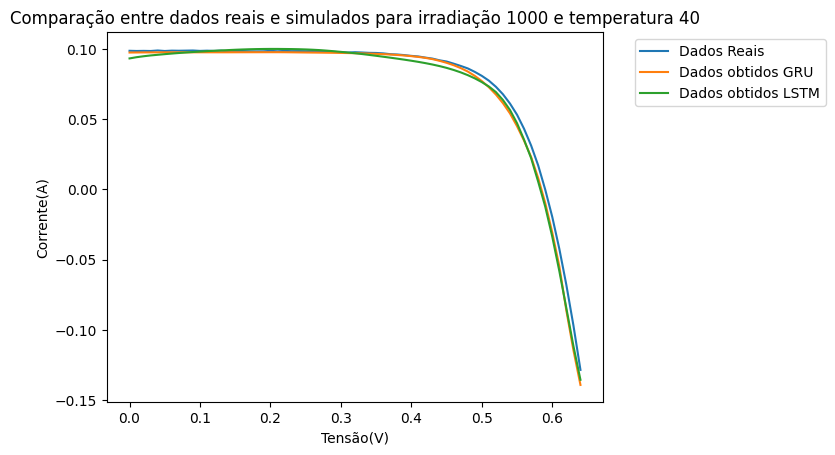

In [70]:
fig, ax = plt.subplots()

ax.plot(dff_teste['Corrente(A)'], label = 'Dados Reais')
ax.plot(dff_teste['CorrenteGRU(A)'], label = 'Dados obtidos GRU')
ax.plot(dff_teste['CorrenteLSTM(A)'], label = 'Dados obtidos LSTM')

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_title(f'Comparação entre dados reais e simulados para irradiação {irr} e temperatura {tmp}')
ax.set_xlabel('Tensão(V)')
ax.set_ylabel('Corrente(A)') 


<h4>o modelo se ajustou bem próximos aos dados reais em alguns dados os modelo LSTM se performou melhor e em outros o modelo GRU foi melhor</h4>

In [71]:
def SimularCurvas(irr, tmp):

    global modelGRU, modellstm, normalizador, alvoNorm

    tensao = np.arange(0.0, 0.65, 0.01)
    irradiacao = np.full(tensao.shape[0], irr)
    temperatura = np.full(tensao.shape[0], tmp)

    dados = {
        'Tensão(V)':tensao,
        'Irradiação':irradiacao,
        'Temperatura':temperatura
    }

    dff_teste = pd.DataFrame(dados) #Tensão(V)	Irradiação	Temperatura
    dff_testeNorm = normalizador.transform(dff_teste)

    previstoTesteGRU = modelGRU(dff_testeNorm)
    previstoTesteLSTM = modellstm(dff_testeNorm)

    dff_teste['CorrenteGRU(A)'] = alvoNorm.inverse_transform(previstoTesteGRU)
    dff_teste['CorrenteLSTM(A)'] = alvoNorm.inverse_transform(previstoTesteLSTM)

    dff_teste.set_index('Tensão(V)', inplace=True)

    fig, ax = plt.subplots()

    # ax.plot(dff_teste['Corrente(A)'], label = 'Dados Reais')
    ax.plot(dff_teste['CorrenteGRU(A)'], label = 'Dados obtidos GRU')
    ax.plot(dff_teste['CorrenteLSTM(A)'], label = 'Dados obtidos LSTM')

    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    ax.set_title(f'Comparação entre dados reais e simulados para irradiação {irr} e temperatura {tmp}')
    ax.set_xlabel('Tensão(V)')
    ax.set_ylabel('Corrente(A)') 


<P>Como o modelo treinado e testando podemos simular alguns valores de irradiação e temperatura</p>
<ol>
    <li>1100; 45</li>
    <li>1500; 65</li>
    <li>950; 10</li>
    <li>100; 40</li>
</ol>

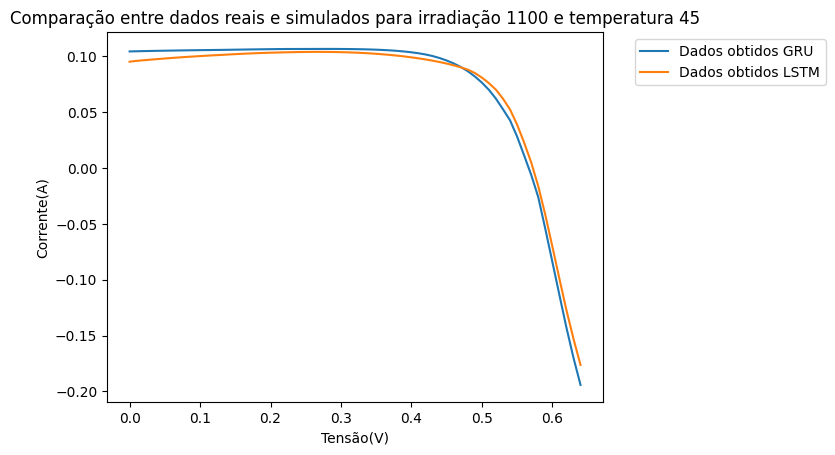

In [77]:
SimularCurvas(1100, 45)

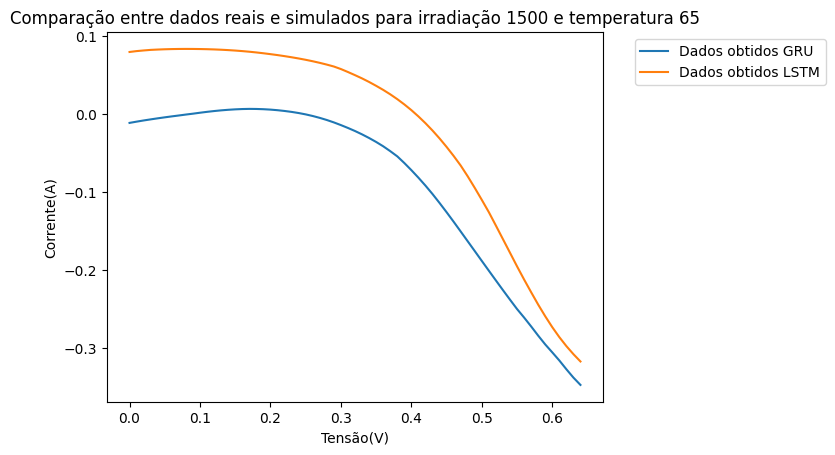

In [332]:
SimularCurvas(1500, 65)

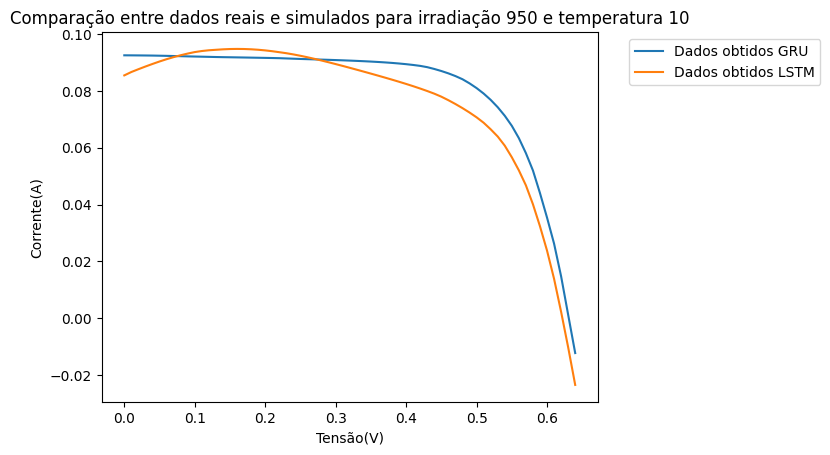

In [78]:
SimularCurvas(950, 10)

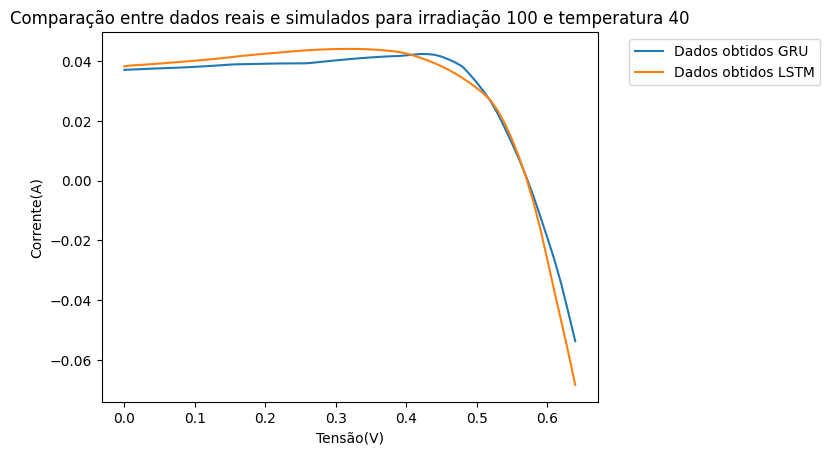

In [317]:
SimularCurvas(100, 40)

<h4>podemos simular a curvas IV para varios cenários de temperaturas e irradiação</ha>